## Рабочая тетрадь 4


## 1 Задание

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

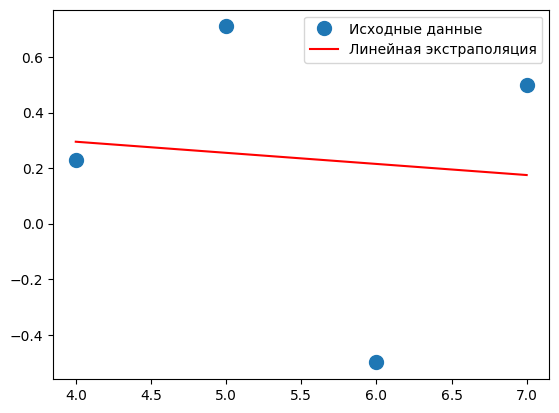

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([4, 5, 6, 7])
y = np.array([0.23, 0.71, -0.5, 0.5])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

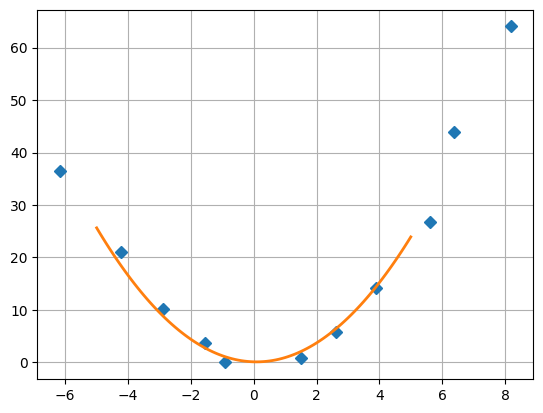

In [2]:
import numpy as np
import matplotlib.pyplot as plt
delta = 1.0
x = np.linspace(-6, 8, 11)
y = x ** 2 + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)

m = np.vstack((x ** 2, x, np.ones(11))).T

s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.show()

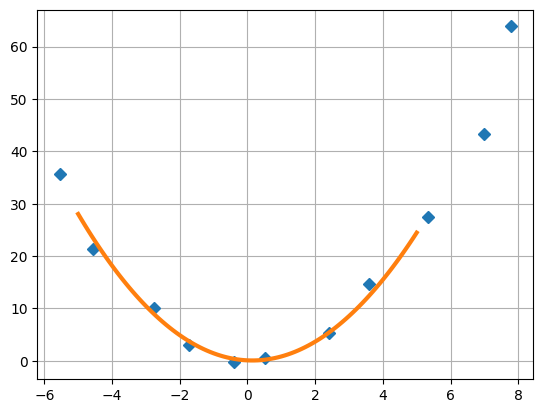

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-6, 8, 11)
y = x ** 2 + delta * (np.random.rand(11) - 0.5)
x += delta * (np.random.rand(11) - 0.5)
m = np.vstack((x ** 3, x ** 2, x, np.ones(11))).T

s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = np.linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.grid()
plt.plot(x_prec, s[0] * x_prec** 3 + s[1] * x_prec ** 2 + s[2] * x_prec+ s[3], '-', lw=3)
plt.show()

## 2 Задание

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

In [4]:
def plt_showing(ax, xdata, ydata, y, f, beta_opt):
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2)
    ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
    ax.set_xlim(0, 5)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)

[0.34107865 0.85427568]
0.00012946381594268697
0.11383886903719434


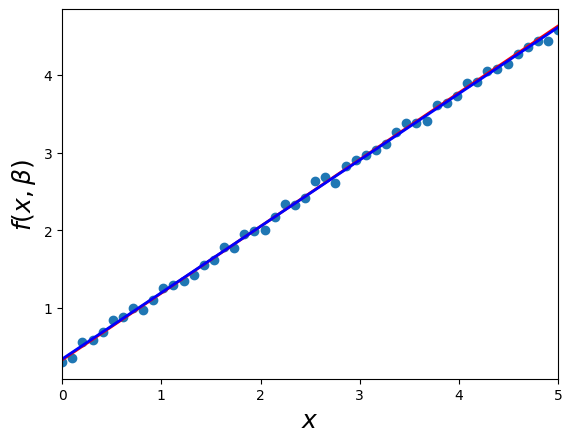

In [5]:
from scipy.optimize import curve_fit
fig_1 = plt.figure()

beta = (0.33, 0.86)

def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)

print(beta_opt)

lin_dev = sum(beta_cov[0])

print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
f_res = sum(residuals ** 2)

print(f_res)
ax = fig_1.add_subplot(111)

plt_showing(ax, xdata, ydata, y, f, beta_opt)

[0.93917175 0.46187566 0.88266763]
0.00021462840429739357
0.17897762022649846


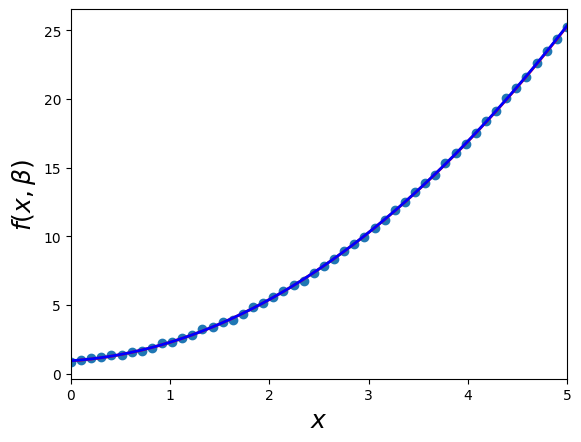

In [6]:
from scipy.optimize import curve_fit

fig_2 = plt.figure()

beta = (0.93, 0.47, 0.88)

def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)
ydata = y + .05 * np.random.randn(len(xdata))

beta_opt, beta_cov = curve_fit(f, xdata, ydata)

print(beta_opt)

lin_dev = sum(beta_cov[0])

print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
f_res = sum(residuals ** 2)

print(f_res)

ax = fig_2.add_subplot(111)
plt_showing(ax, xdata, ydata, y, f, beta_opt)

[ 5.04966957 15.95914393]
7.101598605883177e-05
0.16422030893694306


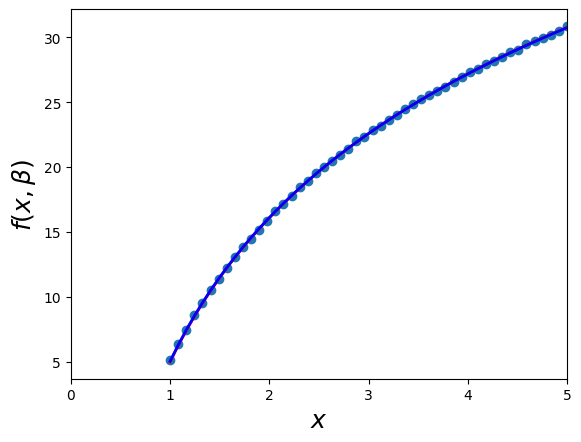

In [7]:
from scipy.optimize import curve_fit
fig_3 = plt.figure()
beta = (5, 16)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)

print(beta_opt)

lin_dev = sum(beta_cov[0])

print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
f_res = sum(residuals ** 2)

print(f_res)

ax = fig_3.add_subplot(111)
plt_showing(ax, xdata, ydata, y, f, beta_opt)

[1.00552364 1.99640643]
4.020950486813149e-06
0.09386177512403555


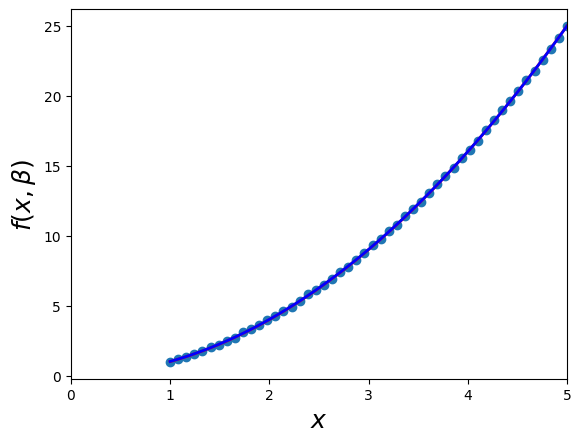

In [8]:
from scipy.optimize import curve_fit
fig_4 = plt.figure()
beta = (1, 2)

def f(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + .05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)

print(beta_opt)

lin_dev = sum(beta_cov[0])

print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
f_res = sum(residuals ** 2)

print(f_res)

ax = fig_4.add_subplot(111)
plt_showing(ax, xdata, ydata, y, f, beta_opt)

## 3 Задание

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

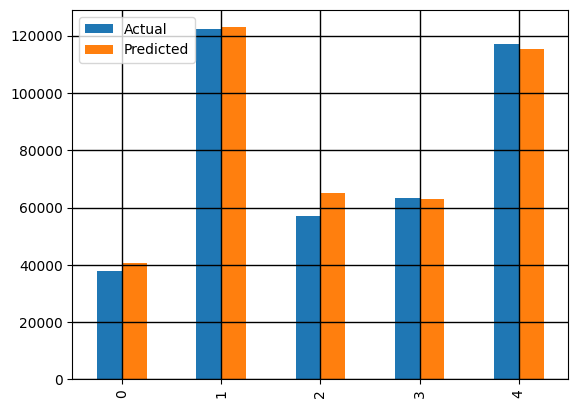

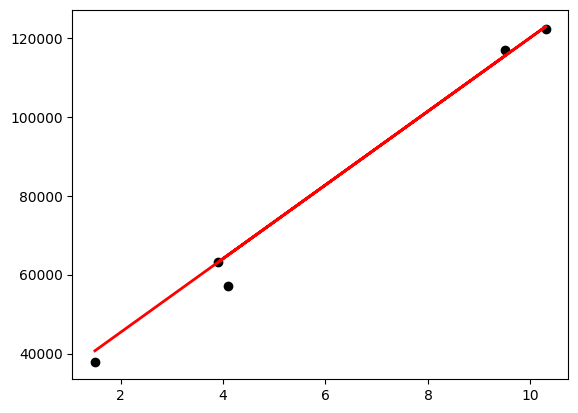

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data_set = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv')
x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='1', color='black')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
data_set = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv')
x = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0,)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
YearsExperience,9312.575127


In [14]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
2,37731.0,40748.961841
28,122391.0,122699.622956
13,57081.0,64961.657170
10,63218.0,63099.142145
26,116969.0,115249.562855
24,109431.0,107799.502753


In [16]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 12823412.298126549


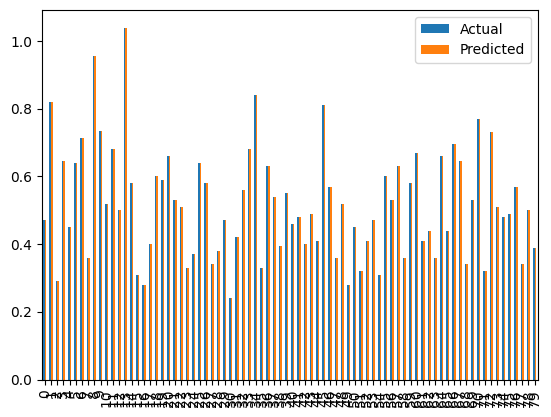

[[1.08000e+01 4.70000e-01 4.30000e-01 2.10000e+00 1.71000e-01 2.70000e+01
  6.60000e+01 9.98200e-01 3.17000e+00 7.60000e-01 1.08000e+01]
 [8.10000e+00 8.20000e-01 0.00000e+00 4.10000e+00 9.50000e-02 5.00000e+00
  1.40000e+01 9.98540e-01 3.36000e+00 5.30000e-01 9.60000e+00]
 [9.10000e+00 2.90000e-01 3.30000e-01 2.05000e+00 6.30000e-02 1.30000e+01
  2.70000e+01 9.95160e-01 3.26000e+00 8.40000e-01 1.17000e+01]
 [1.02000e+01 6.45000e-01 3.60000e-01 1.80000e+00 5.30000e-02 5.00000e+00
  1.40000e+01 9.98200e-01 3.17000e+00 4.20000e-01 1.00000e+01]
 [1.22000e+01 4.50000e-01 4.90000e-01 1.40000e+00 7.50000e-02 3.00000e+00
  6.00000e+00 9.96900e-01 3.13000e+00 6.30000e-01 1.04000e+01]
 [8.20000e+00 6.40000e-01 2.70000e-01 2.00000e+00 9.50000e-02 5.00000e+00
  7.70000e+01 9.97470e-01 3.13000e+00 6.20000e-01 9.10000e+00]
 [9.30000e+00 7.15000e-01 2.40000e-01 2.10000e+00 7.00000e-02 5.00000e+00
  2.00000e+01 9.96600e-01 3.12000e+00 5.90000e-01 9.90000e+00]
 [9.30000e+00 3.60000e-01 3.90000e-01 1.5

ValueError: x and y must be the same size

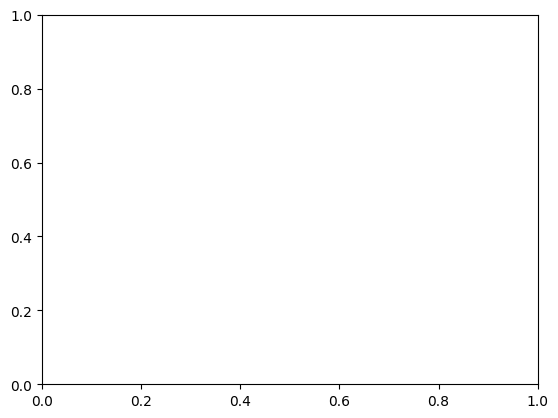

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data_set = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.05 , random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.0000001', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.0000001', color='black')
plt.show()
print(x_test)
print(y_test)
print(y_pred)

plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='red', linewidth=5)
plt.show()

In [ ]:
data_set = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
x = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0,)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [ ]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


In [ ]:
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 0.3844711978201246


Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов

[0.2        0.57692308 0.55555556 0.35714286 0.34482759 0.33333333]


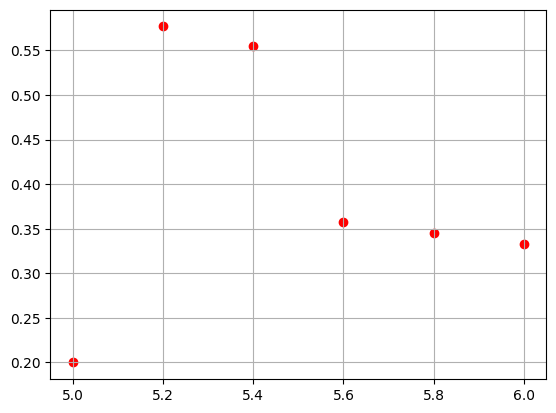

In [31]:
import numpy as np
import matplotlib.pyplot as plt
x = [5.0, 5.2, 5.4, 5.6, 5.8, 6.0]
newx = np.array(x)
y = [2.0, 4.0, 4.0, 3.0, 3.0, 3.0]
k = 1.0
newy = np.array(y)
n1 = []
newn = np.array(n1)
i = 0
while i < 6:
    n =(newy[i]-k)/newx[i]
    n1.append(n)
    i = i + 1
newn = np.array(n1)
i = 0
print(newn)
plt.scatter (newx, newn, c='red')
plt.grid(True)
plt.show()


[-3.8        -3.42307692 -3.44444444 -3.64285714 -3.65517241 -3.66666667]


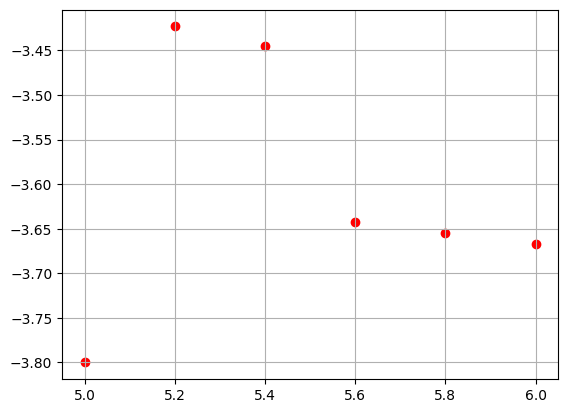

In [45]:
import numpy as np
import matplotlib.pyplot as plt
x = [5.0, 5.2, 5.4, 5.6, 5.8, 6.0]
newx = np.array(x)
y = [2.0, 4.0, 4.0, 3.0, 3.0, 3.0]
c = 1.0
a = 4.0

newy = np.array(y)
n1 = []
newn = np.array(n1)
i = 0
while i < 6:
    n = (newy[i] - (c + (newx[i]*a)))/newx[i]
    n1.append(n)
    i = i + 1
newn = np.array(n1)
i = 0
print(newn)
plt.scatter (newx, newn, c='red')
plt.grid(True)
plt.show()
